# Lab 1: Introduction to Plotting  


<img src="https://matplotlib.org/3.3.3/_images/sphx_glr_anatomy_001.png" alt="Anatomy of Figure" width="500"/>  

__Fig 1__: From the [`matplotlib` documentation](https://matplotlib.org/3.3.3/gallery/showcase/anatomy.html).

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib notebook

## Exercise 1: Loading Data and Plotting (10 pts)  

1. Load the `well_data.txt` data using `numpy`'s `loadtxt` function. The data is formatted such that the columns are:  

  Depth (ft), Electrical Conductivity (mS/m), Temperature (C)   
  
  
2. Convert depth to meters.
3. Produce the following plot using this data (you have creative freedom to make your plot extra  
beautiful). Make sure your figure has:  
  a. Title  
  b. Axis labels  
  c. Legend (not applicable for this lab, but will likely be in the future)  
  d. Readable text  

In [2]:
#1 load data

data_mat = np.loadtxt('well_data.txt')

depth_ft = data_mat[:,0]
conduct  = data_mat[:,1]
temp_C   = data_mat[:,1]


In [3]:
# 2. Convert depth tp meters

depth_m  = depth_ft * 0.3048

<IPython.core.display.Javascript object>


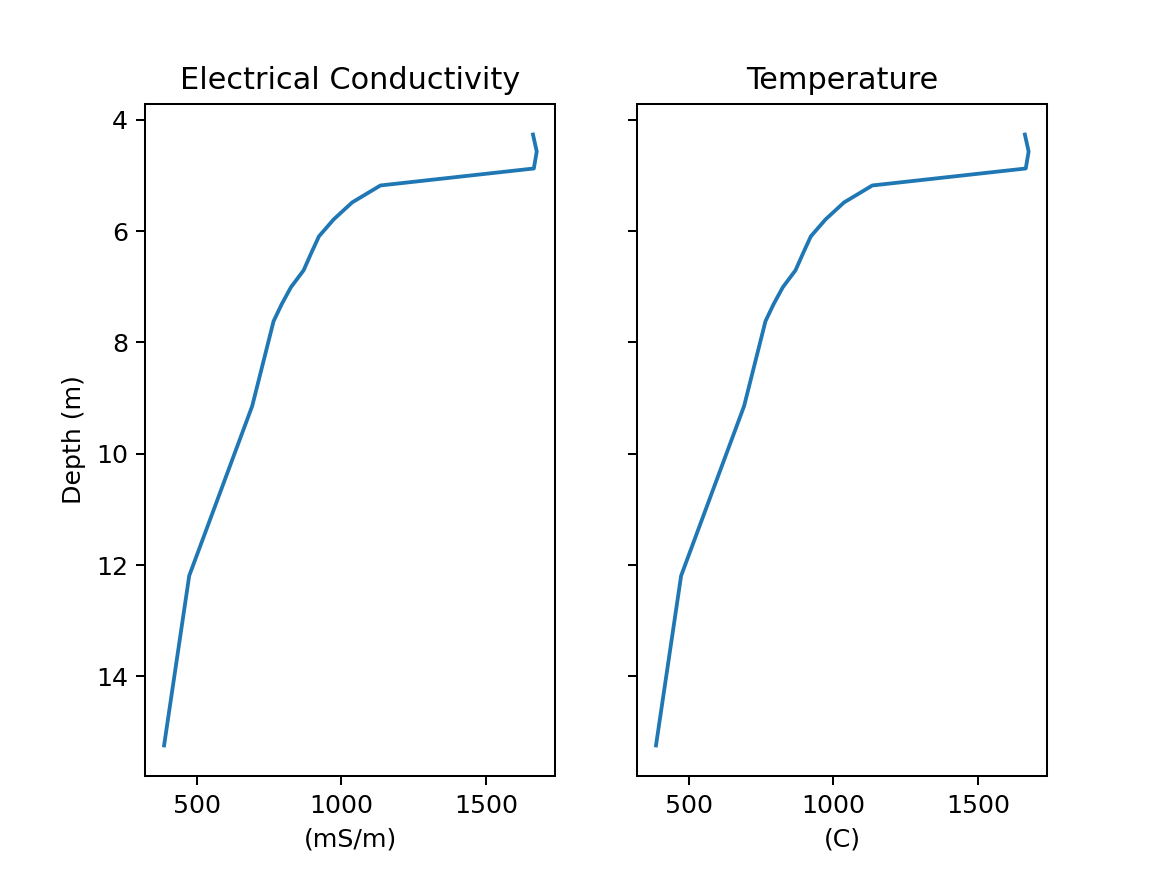

In [4]:
# 3. Plot 
fig, ax = plt.subplots(1,2,sharey=True)

ax[0].plot(conduct,depth_m)
ax[0].set_title('Electrical Conductivity')
ax[0].set_xlabel('(mS/m)')

ax[0].set_ylabel('Depth (m)')


ax[1].plot(temp_C,depth_m)
ax[1].set_title('Temperature')
ax[1].set_xlabel('(C)')

ax[1].invert_yaxis()


## Exercise 2: Loading Data and Plotting (10 pts)  

Load the data file `ammonoids.mat`, which contains the variables `NumAm` and `MasAm`. The values within `NumAm` represent the number of ammonoid shells found in each grid cell, while `MasAm` gives the average weight of the shells found in each grid cell. `NumAm` and `MasAm` are both $m \times n$ matrices of the same dimension (representing the grid in which the shells were originally found). In this case, we will define that there are $m$ cells in the $x$ direction with a spacing ($\Delta x$) of 10m, and $n$ cells in the $y$ direction with a spacing ($\Delta y$) of 10m (see figure).


In [44]:
import numpy as np 
import scipy.io as sio

data  = sio.loadmat('ammonoids.mat')
NumAm = data['NumAm'].astype(np.float32)
MasAm = data['MasAm'].astype(np.float32)

a. Write an `if` statement that checks if the sizes of `MasAm` and `NumAm` are equal. If they are, set $m$ to the number of cells in the $x$-direction and $n$ to the number of cells in the $y$-direction. Hint: use the size(A) command to determine the dimensions of a matrix and the length(A(:,1)) command to find the number of cells in a certain direction. (4 pts)

In [45]:
assert NumAm.shape == MasAm.shape

m,n = NumAm.shape

b. Create a new matrix `TMA` whose elements represent the total mass of the ammonoids within each grid cell. (1 pt)  

In [46]:
TMA = NumAm * MasAm

c. Find the total and average mass of ammonoids per cell in the first row using two different methods: 1) using the `mean` function and 2) with a `for` loop. (8 pts)

d. Make a new variable called `TMA300` that is the same size as `TMA` (with one extra row in x and y) using the `np.zeros(m+1,n+1)` function. If the total mass of the ammonoids in a cell is greater than 300, place the total mass (value in `TMA`) in your new variable at the same cell location. 

In [47]:
TMA300 = TMA.copy()
TMA300[TMA300 < 300.] = np.nan

e. Repeat step (d) making a new variable TMA100 that only includes mass values less than 100, and new variable TMA200 that only include mass values greater than 100 and less than 300. (5 pts)

In [48]:
TMA100 = TMA.copy()
TMA100[TMA100 > 100.] = np.nan

TMA200 = TMA.copy()
TMA200[(100. > TMA200) | (TMA200 > 300.)] = np.nan

f. Calculate the mean mass of the ammonoids greater than 100 and less than 300. Hint: use the function `np.nanmean`. (3 pts)

In [49]:
np.nanmean(TMA200)

186.85

g. Make a spatial plot of `TMA100`, `TMA200`, and `TMA300`. Hint: Make the spatial plot using `plt.pcolormesh` and add a color bar with colorbar. Put all three plots on figure using the subplot axes. 

<IPython.core.display.Javascript object>


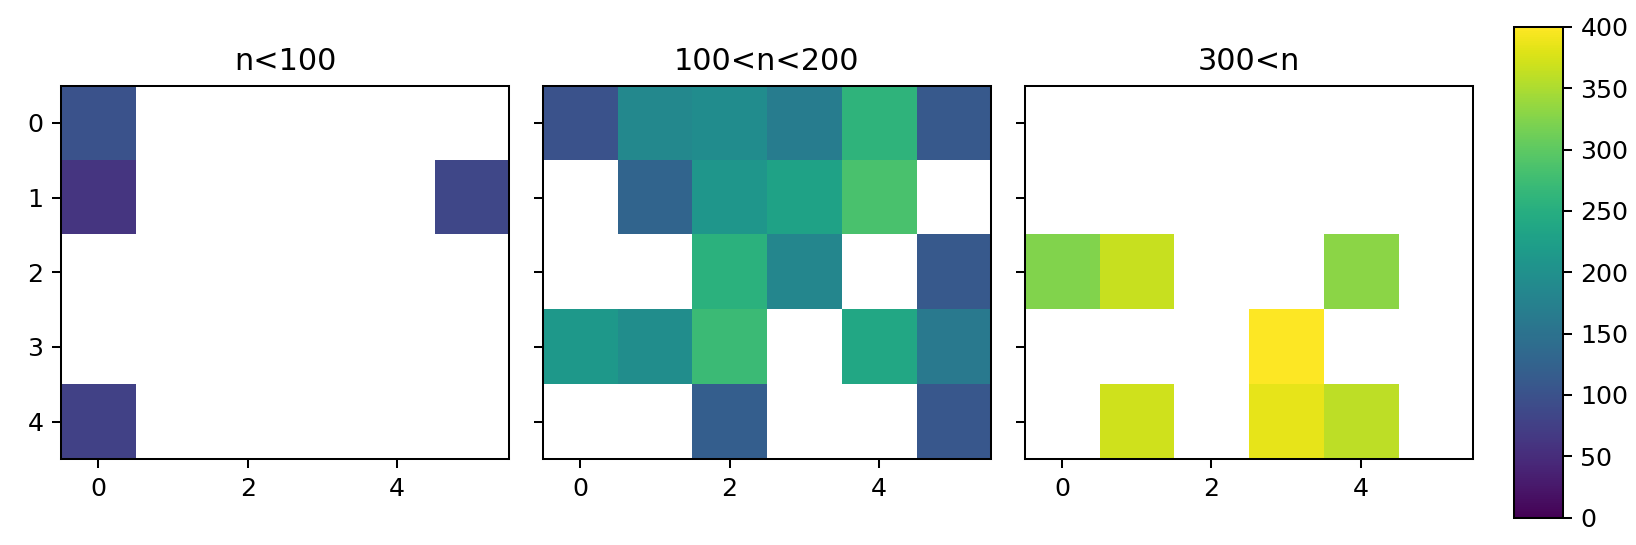

In [50]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(9,3))

ax[0].imshow(TMA100,clim=(0,400))
ax[1].imshow(TMA200,clim=(0,400))
ax[2].imshow(TMA300,clim=(0,400))

# 
ax[0].set_title("n<100")
ax[1].set_title("100<n<200")
ax[2].set_title("300<n")

plt.tight_layout()
plt.subplots_adjust(wspace=0.075,hspace=0.1,right=0.9)

cmap  = plt.get_cmap('viridis')            
cNorm = plt.matplotlib.colors.Normalize(vmin=0, vmax=400.0)
axcb  = fig.add_axes([0.925, 0.05, 0.03, 0.9])
cb1   = plt.matplotlib.colorbar.ColorbarBase(axcb, cmap=cmap, norm=cNorm)
cb1.set_label('Speed (m d$^{-1}$)',rotation=270, labelpad=15)

In [42]:
plt.imshow?